# Support Vector Machines

In this section of the assignment, you will get to implement Support Vector Machines which are among the best (and many believe are indeed the best)“off-the-shelf” supervised learning algorithm.

This section is further divided into 3 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the next subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [36]:
# !pip install numpy
# !pip install matplotlib
# !pip install cvxpy
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

### Subsection 1

In [5]:
# Feel free to use this helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

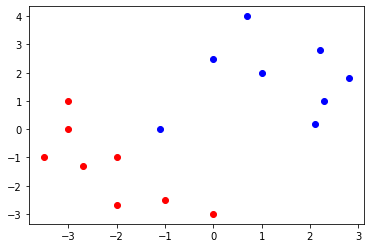

In [47]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

In the next cell you are required to derive the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles. Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**

**Note: You cannot use sklearn SVM functions here**

**Derivation**:

Distance of any point $x_i$ from the line $w^Tx+b=0$ is $\left|\frac{w^Tx_i+b}{||w||}\right|$.

There are two approaches we can take to maximize the margin
1. either set the value of $||w||$ to 1 and maximize $\sum_i |w^Tx_i+b|$ 
2. set the value of margin to be 1, and maximize value of $\frac{1}{||w||}$, which is equivalent of minimizing $\frac{1}{2} w^T w$

We take the second approach and minimize the value of $\frac{1}{2} w^T w$.

The constraints thus for the given objective, with the hard margin, will be to have all the points satisfying $y_i (w^T x_i +b) \ge 1 \, \forall i$, where $y_i$ is the actual class of the point $x_i$.


In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines

You may want to create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

In [7]:
# Write your code here
w = cp.Variable(2)
b = cp.Variable(1)
constraints = [y[i] * (X[i]@w + b) >= 1 for i in range(X.shape[0])]
problem = cp.Problem(cp.Minimize(0.5 * cp.quad_form(w, np.eye(2))), constraints)
problem.solve()

2.3629489603024565

In [11]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

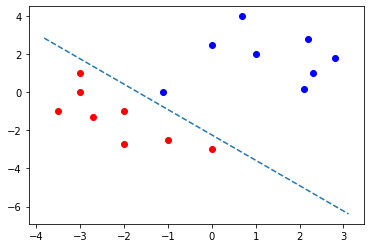

In [12]:
plot_points(X, y)
abline(-w.value[0]/w.value[1], -b.value/w.value[1])
plt.show()

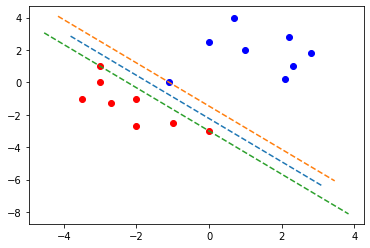

In [13]:
plot_points(X, y)
abline(-w.value[0]/w.value[1], -b.value/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value+1)/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value-1)/w.value[1])
plt.show()

In [22]:
support_vectors = ((X@w.value + b.value > 1.0 - 1e-9) & (X@w.value + b.value < 1.0 + 1e-9)) | ((X@w.value + b.value > -1.0 - 1e-9) & (X@w.value + b.value < -1.0 + 1e-9))
support_vectors

array([False, False,  True, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False])

In the next cell please plot only the support vectors along with the boundary, w vector, and margins. 

**Note: You are not supposed to hard-code the points here**

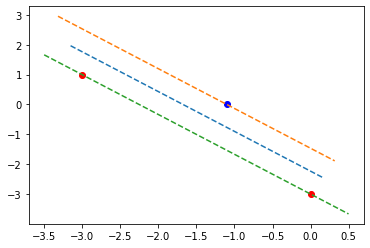

In [26]:
# Write your code here
X_support = X[support_vectors]
y_support = y[support_vectors]
plot_points(X_support, y_support)
abline(-w.value[0]/w.value[1], -b.value/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value+1)/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value-1)/w.value[1])
plt.show()

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Explain your observations theoretically.

In [48]:
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1])
print(X.shape)
new_points = np.array([[-4, -10], [4, 4]])
print(new_points.shape)
X = np.vstack((X, new_points))
X.shape

(16, 2)
(2, 2)


(18, 2)

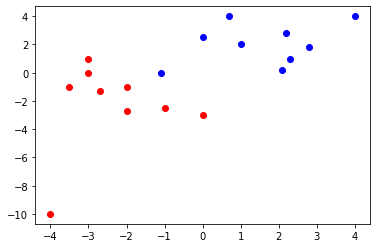

In [49]:
# Re-create the Synthetic Data by adding the points and visualize the points
plot_points(X, y)

In [50]:
# Solve for the decision boundary using this modified dataset
w = cp.Variable(2)
b = cp.Variable(1)
constraints = [y[i] * (X[i]@w + b) >= 1 for i in range(X.shape[0])]
problem = cp.Problem(cp.Minimize(0.5 * cp.quad_form(w, np.eye(2))), constraints)
problem.solve()

2.3629489603024587

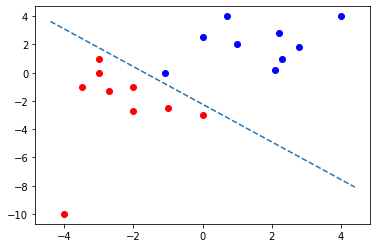

In [51]:
plot_points(X, y)
abline(-w.value[0]/w.value[1], -b.value/w.value[1])
plt.show()

**Explanation**
The boundary separating two classes does not change because the points we added to the dataset do not become the support vectors. This means that the boundary (separating line) only depends on the support vectors.

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell**

**Modified formulation**
minimize the value of $\frac{1}{2} w^T w + C \sum_{i=1}^{n}(err_i) $.

The constraints thus for the given objective, with the hard margin, will be to have all the points satisfying $y_i (w^T x_i +b) \ge 1 - err_i \, \forall i$, where $y_i$ is the actual class of the point $x_i$.



In [57]:
# Write your code here for C= 0.01
C = 0.01
w = cp.Variable(2)
b = cp.Variable(1)
err = cp.Variable(X.shape[0])
constraints = [y[i] * (X[i]@w + b) >= 1 - err[i] for i in range(X.shape[0])]
non_negative = [err[i] >= 0 for i in range(X.shape[0])]
constraints = constraints + non_negative
problem = cp.Problem(cp.Minimize(0.5 * cp.quad_form(w, np.eye(2)) + C*np.ones(X.shape[0])@err), constraints)
problem.solve()

0.09495328307392996

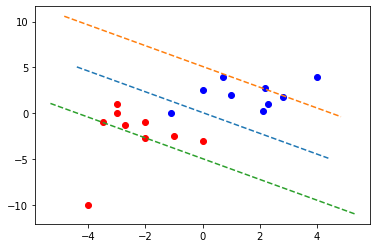

In [58]:
plot_points(X, y)
abline(-w.value[0]/w.value[1], -b.value/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value+1)/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value-1)/w.value[1])
plt.show()

In [59]:
# Write your code here for C= 0.1
C = 0.1
w = cp.Variable(2)
b = cp.Variable(1)
err = cp.Variable(X.shape[0])
constraints = [y[i] * (X[i]@w + b) >= 1 - err[i] for i in range(X.shape[0])]
non_negative = [err[i] >= 0 for i in range(X.shape[0])]
constraints = constraints + non_negative
problem = cp.Problem(cp.Minimize(0.5 * cp.quad_form(w, np.eye(2)) + C*np.ones(X.shape[0])@err), constraints)
problem.solve()

0.30455489224628424

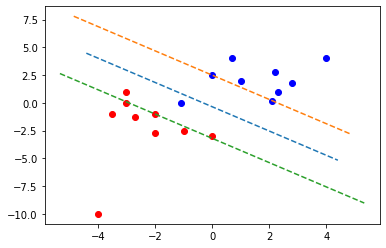

In [60]:
plot_points(X, y)
abline(-w.value[0]/w.value[1], -b.value/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value+1)/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value-1)/w.value[1])
plt.show()

In [76]:
# Write your code here for C= 3
C = 3
w = cp.Variable(2)
b = cp.Variable(1)
err = cp.Variable(X.shape[0])
constraints = [y[i] * (X[i]@w + b) >= 1 - err[i] for i in range(X.shape[0])]
non_negative = [err[i] >= 0 for i in range(X.shape[0])]
constraints = constraints + non_negative
problem = cp.Problem(cp.Minimize(0.5 * cp.quad_form(w, np.eye(2)) + C*np.ones(X.shape[0])@err), constraints)
problem.solve()

2.3629489603024587

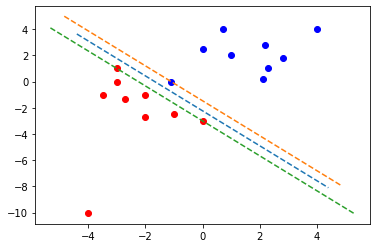

In [77]:
plot_points(X, y)
abline(-w.value[0]/w.value[1], -b.value/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value+1)/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value-1)/w.value[1])
plt.show()

In [63]:
# Write your code here for C= 10
C = 10
w = cp.Variable(2)
b = cp.Variable(1)
err = cp.Variable(X.shape[0])
constraints = [y[i] * (X[i]@w + b) >= 1 - err[i] for i in range(X.shape[0])]
non_negative = [err[i] >= 0 for i in range(X.shape[0])]
constraints = constraints + non_negative
problem = cp.Problem(cp.Minimize(0.5 * cp.quad_form(w, np.eye(2)) + C*np.ones(X.shape[0])@err), constraints)
problem.solve()

2.362948960302459

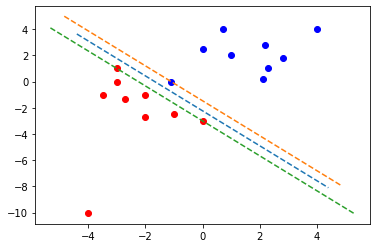

In [64]:
plot_points(X, y)
abline(-w.value[0]/w.value[1], -b.value/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value+1)/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value-1)/w.value[1])
plt.show()

In [71]:
# Write your code here for C= 100
C = 100
w = cp.Variable(2)
b = cp.Variable(1)
err = cp.Variable(X.shape[0])
constraints = [y[i] * (X[i]@w + b) >= 1 - err[i] for i in range(X.shape[0])]
non_negative = [err[i] >= 0 for i in range(X.shape[0])]
constraints = constraints + non_negative
problem = cp.Problem(cp.Minimize(0.5 * cp.quad_form(w, np.eye(2)) + C*np.ones(X.shape[0])@err), constraints)
problem.solve()

2.362948960302459

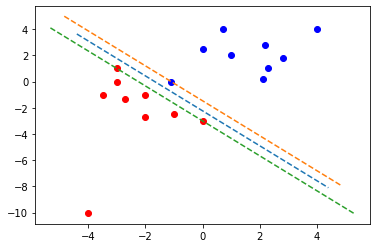

In [78]:
plot_points(X, y)
abline(-w.value[0]/w.value[1], -b.value/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value+1)/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value-1)/w.value[1])
plt.show()

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion?
Explain why? Show your results by appropriate plots?

In [79]:
# Write your Code here
support_vectors = ((X@w.value + b.value > 1.0 - 1e-9) & (X@w.value + b.value < 1.0 + 1e-9)) | ((X@w.value + b.value > -1.0 - 1e-9) & (X@w.value + b.value < -1.0 + 1e-9))
other_data = np.invert(support_vectors)
print(other_data)
X_new = X[other_data]
y_new = y[other_data]
C = 100
w = cp.Variable(2)
b = cp.Variable(1)
err = cp.Variable(X_new.shape[0])
constraints = [y_new[i] * (X_new[i]@w + b) >= 1 - err[i] for i in range(X_new.shape[0])]
non_negative = [err[i] >= 0 for i in range(X_new.shape[0])]
constraints = constraints + non_negative
problem = cp.Problem(cp.Minimize(0.5 * cp.quad_form(w, np.eye(2)) + C*np.ones(X_new.shape[0])@err), constraints)
problem.solve()

[ True  True False  True  True  True  True False False  True  True  True
  True  True  True  True  True  True]


0.13585196337599129

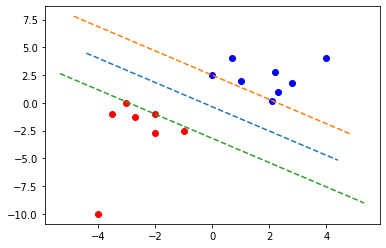

In [80]:
plot_points(X_new, y_new)
abline(-w.value[0]/w.value[1], -b.value/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value+1)/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value-1)/w.value[1])
plt.show()

### Subsection 2

In [81]:
# !pip install python-mnist
# !rm -rf samples
# !mkdir samples
# !wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
# !gunzip samples/train-images-idx3-ubyte.gz
# !wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
# !gunzip samples/train-labels-idx1-ubyte.gz
# !wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
# !gunzip samples/t10k-images-idx3-ubyte.gz
# !wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
# !gunzip samples/t10k-labels-idx1-ubyte.gz

--2021-03-06 10:01:03--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 2606:4700:90ce:3911:88d7:37:be93:f32b, 172.67.171.76, 104.21.29.36
Connecting to yann.lecun.com (yann.lecun.com)|2606:4700:90ce:3911:88d7:37:be93:f32b|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  98.2KB/s    in 76s     

2021-03-06 10:02:20 (128 KB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2021-03-06 10:02:20--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 2606:4700:90ce:3911:88ca:e6:be93:f32b, 172.67.171.76, 104.21.29.36
Connecting to yann.lecun.com (yann.lecun.com)|2606:4700:90ce:3911:88ca:e6:be93:f32b|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip

In [ ]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST

In [ ]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

print(images_train.shape)
print(labels_train.shape)

In [ ]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape)

- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.